<a href="https://colab.research.google.com/github/lokalov/lokalov_ML/blob/main/courses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Добавление библиотек

In [ ]:
!pip install --upgrade matplotlib > None # need refresh enviroment after installation

In [ ]:
#pip install numpy

In [ ]:
#pip install pandas

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

### Подготовка данных

In [ ]:
path = 'datasetVAL.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [ ]:
data.head()

,N,VOZR,GOD_POST,VREM_OB,COD_COURS,UROVEN,NAPR,UZNAL,VR_PUT,PROFROD,TEACHER,STAG
1,6561,13,2016,1,6,3,2,знакомые,32,инженер,150,0
2,6587,14,2016,8,13,3,4,интернет,15,инженер,140,1
3,6971,14,2016,8,13,3,4,интернет,5,заведующий,140,1
4,6984,16,2016,8,16,3,7,знакомые,33,преподаватель,7,13
5,7045,14,2016,8,11,2,5,знакомые,17,менеджер,144,0



*   N - идентификационный номер учащегося
*   VOZR - полных лет учащемуся
*   GOD_POST - год поступления
*   VREM_OB - продолжительность обучения (в месяцах)Новый пункт
*   COD_COURS - код курса - коррелирует с относительной сложностью курса
*   UROVEN - степень специализации курса (1-2-3)
*   NAPR - код предметной области (напр. графика, web-дизайн и т.д)
*   UZNAL - источник информации о курсах
*   VR_PUT - примерное время на дорогу до курсов (мин)
*   PROFROD - профессия родителя (заказчика)
*   TEACHER - код преподавателя
*   STAG - стаж преподавателя (в годах на год поступления учащегося)








In [ ]:
data.shape

(3759, 12)

In [ ]:
data.dtypes

N             int64
VOZR          int64
GOD_POST      int64
VREM_OB       int64
COD_COURS     int64
UROVEN        int64
NAPR          int64
UZNAL        object
VR_PUT        int64
PROFROD      object
TEACHER       int64
STAG          int64
dtype: object

Группировка данных

In [ ]:
agg_func_selection = {'TEACHER': ['first', 'last'],'STAG': ['first', 'last'],'VREM_OB' : ['sum'], 'COD_COURS': ['first','last','count'], 'UROVEN': ['last']}

In [ ]:
df=data.groupby(['N','GOD_POST','VOZR','VR_PUT']).agg(agg_func_selection)

In [ ]:
print(df)

                           TEACHER       STAG      VREM_OB COD_COURS       \
                             first last first last     sum     first last   
N     GOD_POST VOZR VR_PUT                                                  
6561  2016     13   32         150  150     0    0       1         6    6   
6587  2016     14   15         140  140     1    1       8        13   13   
6971  2016     14   5          140  140     1    1       8        13   13   
6984  2016     16   33           7    7    13   13       8        16   16   
7045  2016     14   17         144  144     0    0       8        11   11   
...                            ...  ...   ...  ...     ...       ...  ...   
13432 2021     14   37           7    7    18   18       8         4    4   
13438 2021     12   35         174  174     0    0       7         2    2   
13441 2021     11   38         148  148     5    5       7         2    2   
13467 2021     12   8          166  166     1    1       6         0    0   

In [ ]:
df.head()

TEACHER       STAG      VREM_OB COD_COURS       \
                            first last first last     sum     first last   
N    GOD_POST VOZR VR_PUT                                                  
6561 2016     13   32         150  150     0    0       1         6    6   
6587 2016     14   15         140  140     1    1       8        13   13   
6971 2016     14   5          140  140     1    1       8        13   13   
6984 2016     16   33           7    7    13   13       8        16   16   
7045 2016     14   17         144  144     0    0       8        11   11   

                                UROVEN  
                          count   last  
N    GOD_POST VOZR VR_PUT               
6561 2016     13   32         1      3  
6587 2016     14   15         1      3  
6971 2016     14   5          1      3  
6984 2016     16   33         1      3  
7045 2016     14   17         1      2

KeyError: 'Porosity_(matrix_average_%)'

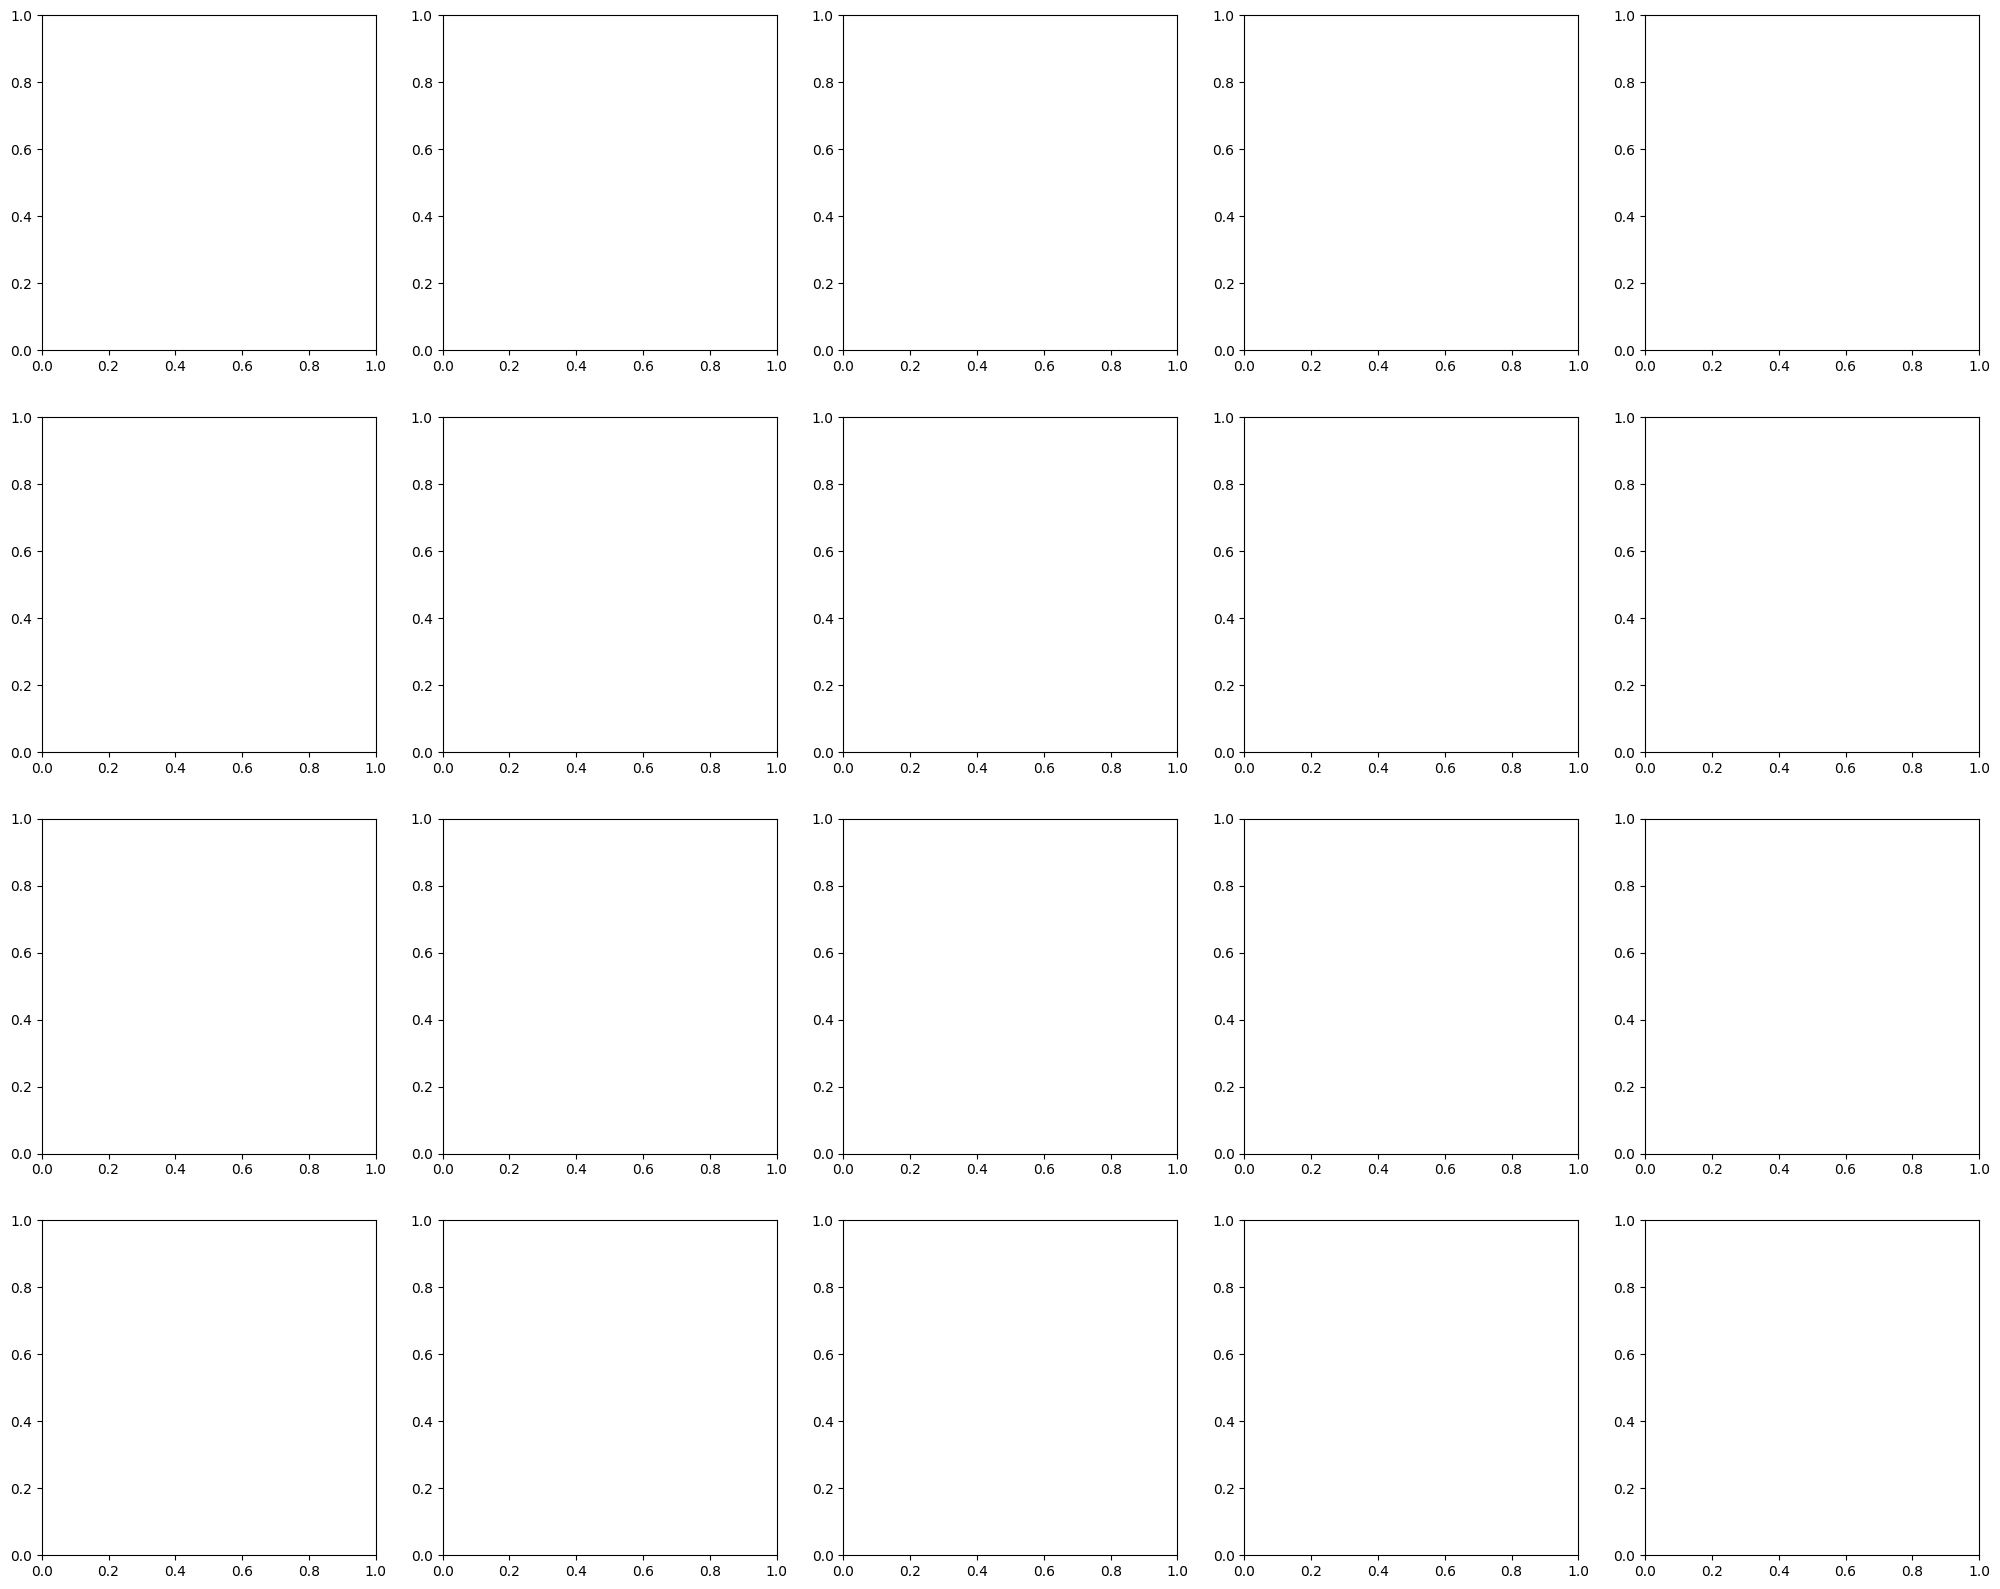

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Porosity_(matrix_average_%)", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])